In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns",None)
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('finalTrain.csv')

In [3]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [4]:
df.shape

(45584, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [6]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min)
count,43730.000000,43676.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,44591.000000,45584.000000
mean,29.566911,4.633774,17.017948,70.229684,17.465480,70.844161,1.023385,0.744635,26.293963
std,5.815064,0.334744,8.185674,22.885575,7.335562,21.120578,0.839055,0.572510,9.384298
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,12.933284,73.170000,12.988453,73.280000,0.000000,0.000000,19.000000
50%,30.000000,4.700000,18.551440,75.897963,18.633934,76.002574,1.000000,1.000000,26.000000
75%,35.000000,4.900000,22.728163,78.044095,22.785049,78.107044,2.000000,1.000000,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000


In [7]:
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [8]:
df.isnull().sum()/df.shape[0]*100 #We have a small number of null values

ID                             0.000000
Delivery_person_ID             0.000000
Delivery_person_Age            4.067217
Delivery_person_Ratings        4.185679
Restaurant_latitude            0.000000
Restaurant_longitude           0.000000
Delivery_location_latitude     0.000000
Delivery_location_longitude    0.000000
Order_Date                     0.000000
Time_Orderd                    3.797385
Time_Order_picked              0.000000
Weather_conditions             1.351351
Road_traffic_density           1.318445
Vehicle_condition              0.000000
Type_of_order                  0.000000
Type_of_vehicle                0.000000
multiple_deliveries            2.178396
Festival                       0.500176
City                           2.632503
Time_taken (min)               0.000000
dtype: float64

In [9]:
df.nunique()

ID                             45584
Delivery_person_ID              1320
Delivery_person_Age               22
Delivery_person_Ratings           28
Restaurant_latitude              657
Restaurant_longitude             518
Delivery_location_latitude      4373
Delivery_location_longitude     4373
Order_Date                        44
Time_Orderd                      176
Time_Order_picked                193
Weather_conditions                 6
Road_traffic_density               4
Vehicle_condition                  4
Type_of_order                      4
Type_of_vehicle                    4
multiple_deliveries                4
Festival                           2
City                               3
Time_taken (min)                  45
dtype: int64

In [10]:
obj = df.select_dtypes(include=['object'])
for i in obj.columns:
    print(df[i].value_counts())

0xcdcd    1
0xa63a    1
0xa16d    1
0xa561    1
0xa9a5    1
         ..
0x17ff    1
0x2205    1
0x666     1
0xb932    1
0x5fb2    1
Name: ID, Length: 45584, dtype: int64
JAPRES11DEL02     67
PUNERES01DEL01    67
VADRES11DEL02     66
VADRES08DEL02     66
JAPRES03DEL01     66
                  ..
GOARES01DEL03      7
DEHRES18DEL03      7
KOCRES16DEL03      6
KOLRES09DEL03      6
BHPRES010DEL03     5
Name: Delivery_person_ID, Length: 1320, dtype: int64
15-03-2022    1192
03-04-2022    1178
13-03-2022    1169
26-03-2022    1165
24-03-2022    1162
09-03-2022    1159
05-04-2022    1156
05-03-2022    1154
07-03-2022    1153
03-03-2022    1150
21-03-2022    1149
11-03-2022    1148
19-03-2022    1148
30-03-2022    1141
01-03-2022    1140
28-03-2022    1139
17-03-2022    1134
01-04-2022    1133
02-03-2022    1012
10-03-2022     996
16-03-2022     995
20-03-2022     993
02-04-2022     992
06-03-2022     986
04-03-2022     980
29-03-2022     977
25-03-2022     974
14-03-2022     973
11-02-2022    

### Delivery_person_ID

In [11]:
df['Delivery_person_ID'].head()

0     DEHRES17DEL01
1     KOCRES16DEL01
2    PUNERES13DEL03
3    LUDHRES15DEL02
4     KNPRES14DEL02
Name: Delivery_person_ID, dtype: object

In [12]:
df['Dest_City']=df['Delivery_person_ID'].str.split('RES',expand=True)[0]

In [13]:
df['Dest_City'].nunique() #22 different cities

22

In [14]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Dest_City
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,DEH
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,KOC
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,PUNE
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,LUDH
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,KNP


### Delivery_person_Ratings

In [15]:
df['Delivery_person_Ratings'].head()

0    4.2
1    4.7
2    4.7
3    4.3
4    4.7
Name: Delivery_person_Ratings, dtype: float64

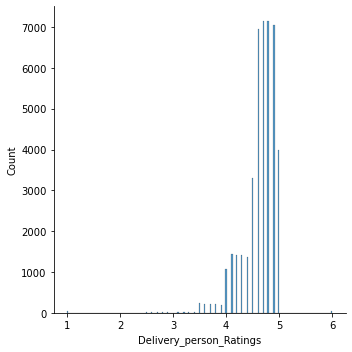

In [16]:
sns.displot(df['Delivery_person_Ratings'])

In [17]:
df[df['Delivery_person_Ratings']>4].shape[0]/df.shape[0] #90% of ratings falls between 4 to 5

0.9045279045279045

In [18]:
df['Delivery_person_Ratings']=df['Delivery_person_Ratings'].astype('float64')

In [19]:
df['Delivery_person_Ratings'].isnull().sum()


1908

### Delivery_person_Age

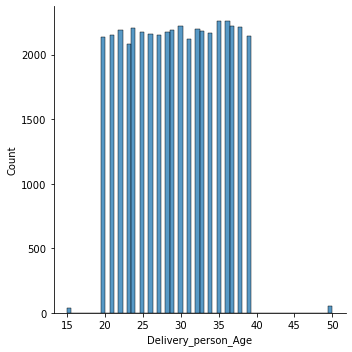

In [20]:
sns.displot(df['Delivery_person_Age'])

In [21]:
df[df['Delivery_person_Age']<18].shape[0] #38 minors

38

In [22]:
df['Order_Date']=pd.to_datetime(df['Order_Date'])
df['year']= df['Order_Date'].dt.year
df['month']= df['Order_Date'].dt.month
df['day']= df['Order_Date'].dt.day
df.drop('Order_Date',inplace=True,axis=1)

In [23]:
#time orderd contains some data in "0.2564" format and also has some null values
df['Time_Orderd']=df['Time_Orderd'].str.replace(".",":")
df.dropna(subset=['Time_Orderd'],inplace=True)

In [24]:
df['Time_Orderd'].value_counts() #need to convert 0:8333 to 0:83

21:55          461
17:55          456
0:833333333    449
22:20          448
21:35          446
              ... 
14:30           57
14:15           56
0:666666667     53
13:20           52
16:30           51
Name: Time_Orderd, Length: 176, dtype: int64

In [25]:
def extract_hour_time(x):
    try:
        hh=x.split(':')[0]
        mm=x.split(':')[1][0:2]
        return hh+':'+mm
    except:
        return '00:00'

df['Time_Orderd']=df['Time_Orderd'].apply(extract_hour_time)
df['Time_Orderd']

0        21:55
1        14:55
2        17:30
3        09:20
4        19:50
         ...  
45579    11:35
45580    19:55
45581    23:50
45582    13:35
45583    17:10
Name: Time_Orderd, Length: 43853, dtype: object

In [26]:
df['Time_Orderd'] = pd.to_datetime(df['Time_Orderd'], format='%H:%M',errors='ignore')

In [27]:
df['Time_Orderd'].value_counts()

21:55    461
17:55    456
0:83     449
22:20    448
21:35    446
        ... 
14:30     57
14:15     56
0:66      53
13:20     52
16:30     51
Name: Time_Orderd, Length: 176, dtype: int64

In [28]:
df['Time_Orderd_Hour']=df['Time_Orderd'].str.split(':',expand=True)[0] #Expand=True returns a df otherwise a series
df['Time_Orderd_Hour']=df['Time_Orderd_Hour'].replace('0','00')
df['Time_Orderd_Hour']=df['Time_Orderd_Hour'].astype('int64')

In [29]:
df['Time_Orderd_Min']=df['Time_Orderd'].str.split(':',expand=True)[1]
df['Time_Orderd_Min']=df['Time_Orderd_Min'].replace('0','00')
df['Time_Orderd_Min']=df['Time_Orderd_Min'].astype('int64')

### Time_Order_picked

In [30]:
df['Time_Order_picked'].value_counts()

21:30    483
22:50    453
21:45    445
17:55    442
18:40    441
        ... 
08:15     45
16:15     44
16:10     40
17:10     37
16:20     36
Name: Time_Order_picked, Length: 193, dtype: int64

In [31]:
df['Time_Order_picked'].tail(20)

45564          20:45
45565          22:20
45566    0.916666667
45567          17:30
45568          22:15
45569          10:40
45570          18:20
45571          09:15
45572          20:40
45573          09:15
45574          21:20
45575          09:50
45576          18:25
45577    0.916666667
45578          21:55
45579          11:45
45580          20:10
45581       24:05:00
45582          13:40
45583          17:15
Name: Time_Order_picked, dtype: object

In [32]:
df['Time_Order_picked'] = df['Time_Order_picked'].str.replace('.', ':')
df['Time_Order_picked']=df['Time_Order_picked'].apply(extract_hour_time)
df['Time_Order_picked']= pd.to_datetime(df['Time_Order_picked'], format='%H:%M',errors='ignore')

In [33]:
df['Time_Order_picked_Hour']=df['Time_Order_picked'].str.split(":",expand=True)[0].astype('int')
df['Time_Order_picked_Min']=df['Time_Order_picked'].str.split(":",expand=True)[1].astype('int')

### Restaurant_latitude,Restaurant_longitude

In [34]:
df[['Restaurant_latitude','Restaurant_longitude']].describe()

,Restaurant_latitude,Restaurant_longitude
count,43853.000000,43853.000000
mean,17.242245,70.763328
std,7.699200,21.138033
min,-30.902872,0.000000
25%,12.933298,73.170283
50%,18.554382,75.898497
75%,22.732225,78.045359
max,30.914057,88.433452


In [35]:
df[df['Restaurant_latitude']<0][['Restaurant_latitude','Restaurant_longitude']] #(-27.163303,78.057044) latitude data showing the location in Indian ocean
#(27.163303,78.057044) location is agra
#-ve latitude is probably a mistake we need to change it to +ve


,Restaurant_latitude,Restaurant_longitude
83,-27.163303,78.057044
274,-27.165108,78.015053
1082,-15.546594,73.760431
1774,-23.230791,77.437020
1967,-22.539129,88.365507
...,...,...
43851,-15.498603,73.826911
44042,-15.157944,73.950889
44631,-9.982834,76.283268
44924,-19.874733,75.353942


In [36]:
df['Restaurant_latitude']=df['Restaurant_latitude'].abs()

### Distance calculation using Haversine formula

In [37]:
import math

def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat / 2) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c
    return distance

df['distance'] = df.apply(lambda x:haversine_distance(x['Restaurant_latitude'], x['Restaurant_longitude'], x['Delivery_location_latitude'], x['Delivery_location_longitude']), axis=1)

In [38]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Dest_City,year,month,day,Time_Orderd_Hour,Time_Orderd_Min,Time_Order_picked_Hour,Time_Order_picked_Min,distance
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,DEH,2022,12,2,21,55,22,10,10.280582
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,KOC,2022,2,13,14,55,15,5,6.242319
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,PUNE,2022,4,3,17,30,17,40,13.787860
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,LUDH,2022,2,13,9,20,9,30,2.930258
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,KNP,2022,2,14,19,50,20,5,19.396618


In [39]:
df.sort_values(by='distance', ascending=False).head(5) # Top 5 maximum destance 

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Dest_City,year,month,day,Time_Orderd_Hour,Time_Orderd_Min,Time_Order_picked_Hour,Time_Order_picked_Min,distance
15701,0xca7a,ALHRES12DEL03,22.0,5.0,25.443994,81.860187,25.583994,82.000187,22:10,22:15,Sandstorms,Low,1,Meal,motorcycle,0.0,No,Urban,12,ALH,2022,12,2,22,10,22,15,20.969489
25917,0xde83,ALHRES12DEL03,32.0,3.8,25.443994,81.860187,25.583994,82.000187,20:25,20:30,Sandstorms,Jam,2,Snack,motorcycle,1.0,No,Urban,33,ALH,2022,2,14,20,25,20,30,20.969489
903,0xd8af,ALHRES12DEL03,22.0,4.7,25.443994,81.860187,25.583994,82.000187,22:55,23:10,Cloudy,Low,2,Drinks,electric_scooter,0.0,No,Metropolitian,26,ALH,2022,2,16,22,55,23,10,20.969489
25467,0xdb1a,ALHRES07DEL03,25.0,4.7,25.449659,81.839744,25.589659,81.979744,21:10,21:15,Windy,Jam,1,Snack,scooter,0.0,No,Urban,18,ALH,2022,2,16,21,10,21,15,20.969045
16631,0xe265,ALHRES07DEL03,37.0,4.8,25.449659,81.839744,25.589659,81.979744,0:91,22:15,Sunny,Jam,1,Buffet,scooter,0.0,No,Urban,20,ALH,2022,12,2,0,91,22,15,20.969045


In [40]:
df.sort_values(by='distance',ascending=True).head(5) # Minimum distance

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Dest_City,year,month,day,Time_Orderd_Hour,Time_Orderd_Min,Time_Order_picked_Hour,Time_Order_picked_Min,distance
26576,0xc88c,LUDHRES04DEL01,21.0,4.5,30.914057,75.839820,30.924057,75.849820,09:10,09:20,Windy,Low,2,Drinks,electric_scooter,1.0,No,Metropolitian,13,LUDH,2022,2,13,9,10,9,20,1.465067
33057,0xcd9d,LUDHRES04DEL01,21.0,4.9,30.914057,75.839820,30.924057,75.849820,10:50,11:05,Cloudy,Low,0,Buffet,motorcycle,1.0,No,Metropolitian,16,LUDH,2022,11,2,10,50,11,5,1.465067
7401,0xcb5d,LUDHRES04DEL01,28.0,4.8,30.914057,75.839820,30.924057,75.849820,11:15,11:20,Stormy,High,2,Snack,scooter,1.0,No,Metropolitian,16,LUDH,2022,2,17,11,15,11,20,1.465067
28253,0xd35f,LUDHRES05DEL01,32.0,4.8,30.905562,75.832841,30.915562,75.842841,11:40,11:45,Sandstorms,High,2,Buffet,electric_scooter,1.0,No,Metropolitian,26,LUDH,2022,2,17,11,40,11,45,1.465123
18390,0xcdce,LUDHRES05DEL01,20.0,4.7,30.905562,75.832841,30.915562,75.842841,08:45,08:50,Sunny,Low,2,Meal,scooter,1.0,No,Urban,21,LUDH,2022,2,15,8,45,8,50,1.465123


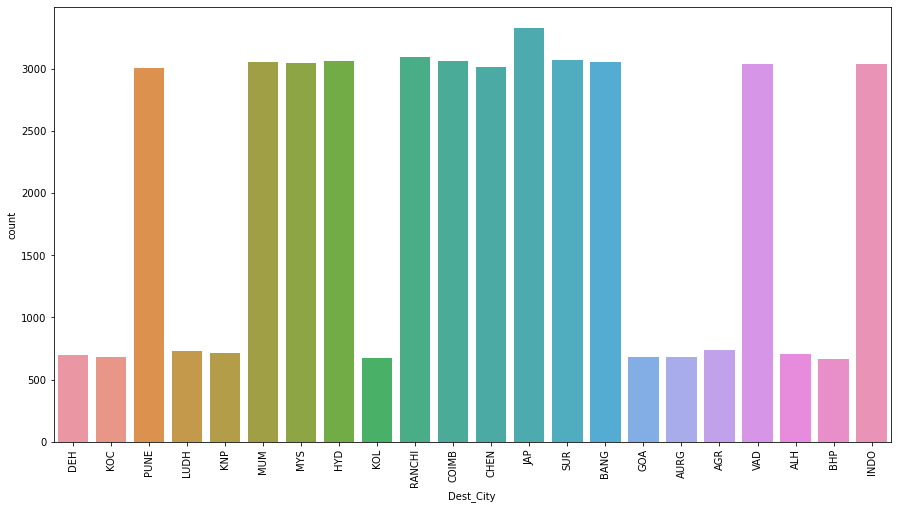

In [41]:
plt.figure(figsize=(15,8))
sns.countplot(df.Dest_City)
plt.xticks(rotation='vertical')
plt.show()

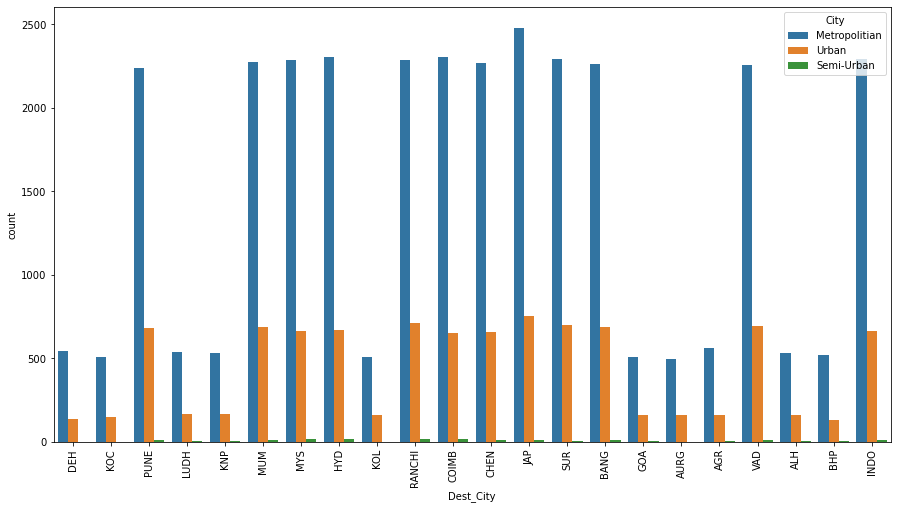

In [42]:
plt.figure(figsize=(15,8))
sns.countplot(df.Dest_City,hue=df.City)
plt.xticks(rotation='vertical')
plt.show()# as expected Metropolitian cities ordered most of the orders

<AxesSubplot:xlabel='Type_of_order', ylabel='count'>

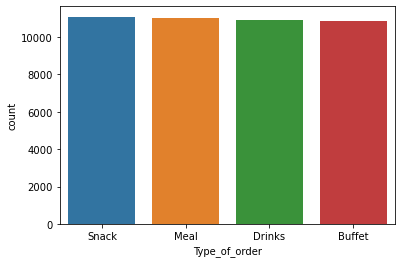

In [43]:
sns.countplot(df.Type_of_order) #The type of order is evenly distributed

<AxesSubplot:xlabel='City', ylabel='count'>

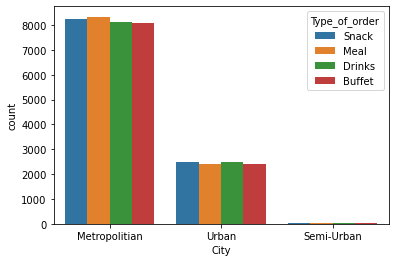

In [44]:
sns.countplot(df.City,hue=df.Type_of_order)

<AxesSubplot:xlabel='Type_of_order', ylabel='count'>

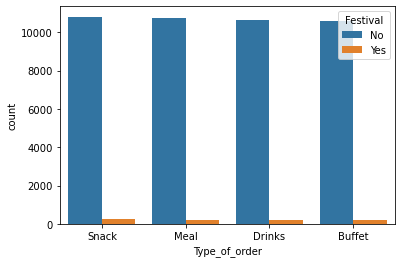

In [45]:
sns.countplot(df.Type_of_order,hue=df.Festival) #Festival doesn't affect the food ordering frequency

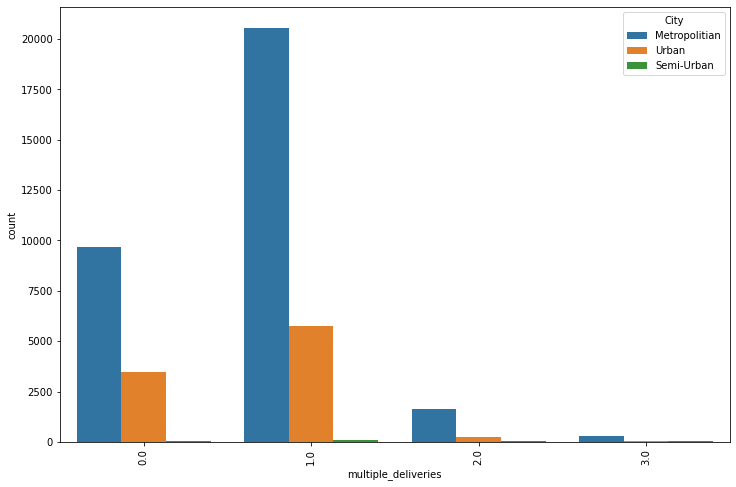

In [46]:
plt.figure(figsize=(12,8))
sns.countplot(df['multiple_deliveries'],hue=df['City'])
plt.xticks(rotation='vertical')
plt.show()

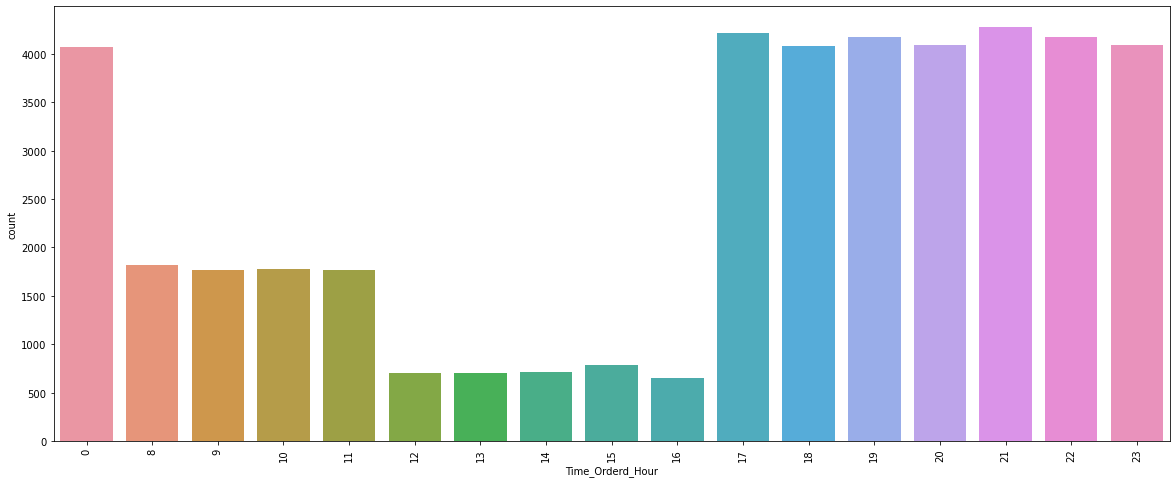

In [47]:
plt.figure(figsize=(20,8))
sns.countplot(df['Time_Orderd_Hour'])
plt.xticks(rotation='vertical')
plt.show()
#Most orders happen during the evening to night time.

<AxesSubplot:xlabel='Festival', ylabel='Time_taken (min)'>

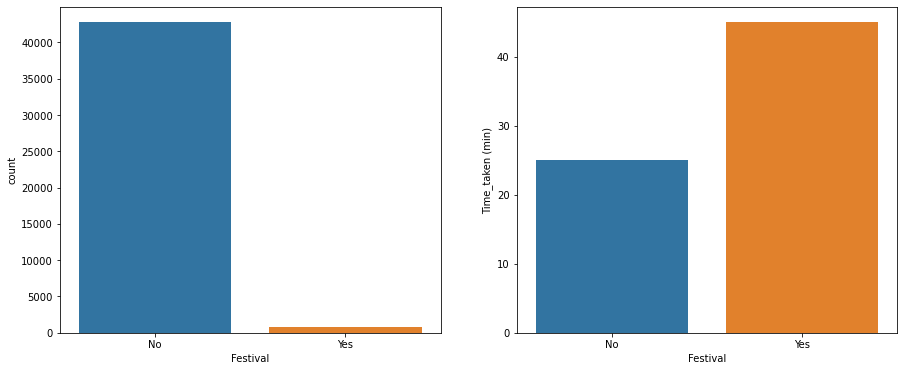

In [48]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(df.Festival)

plt.subplot(1,2,2)
rating=df.groupby('Festival').median().reset_index()
sns.barplot(x='Festival',y='Time_taken (min)',data=rating)

#As you can see the no. of orders during the festival is very less however it has taken much more time to deliver

<AxesSubplot:xlabel='City', ylabel='Time_taken (min)'>

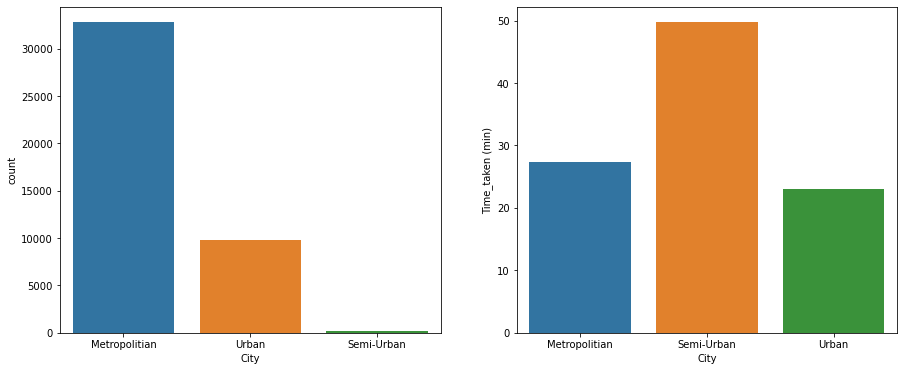

In [49]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(df.City)

plt.subplot(1,2,2)
rating=df.groupby('City').mean().reset_index()
sns.barplot(x='City',y='Time_taken (min)',data=rating)
#It takes longer to deliver food in semi-urban cities even though there are fewer orders compared to metropolitan areas

<AxesSubplot:xlabel='Vehicle_condition', ylabel='count'>

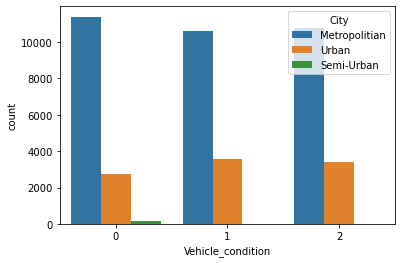

In [50]:
sns.countplot(df.Vehicle_condition,hue=df.City) #Vehicle condition is overall good in all 3 cities
#It has taken more time to deliver food in semi-urban cities, likely due to traffic or road conditions.

<AxesSubplot:xlabel='City', ylabel='count'>

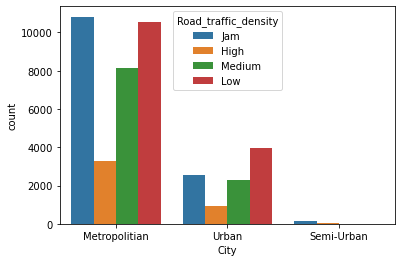

In [51]:
sns.countplot(df.City,hue=df.Road_traffic_density)

In [52]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Dest_City,year,month,day,Time_Orderd_Hour,Time_Orderd_Min,Time_Order_picked_Hour,Time_Order_picked_Min,distance
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,DEH,2022,12,2,21,55,22,10,10.280582
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,KOC,2022,2,13,14,55,15,5,6.242319
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,PUNE,2022,4,3,17,30,17,40,13.787860
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,LUDH,2022,2,13,9,20,9,30,2.930258
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,KNP,2022,2,14,19,50,20,5,19.396618


In [53]:
df.drop(['ID','Delivery_person_ID','Time_Orderd','Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude',
        'year','month','day','Time_Orderd_Min','Time_Order_picked_Hour','Time_Order_picked_Min','Dest_City','Time_Orderd','Time_Order_picked'],axis=1,inplace=True)

In [54]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Dest_City,Time_Orderd_Hour,distance
0,36.0,4.2,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,DEH,21,10.280582
1,21.0,4.7,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,KOC,14,6.242319
2,23.0,4.7,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,PUNE,17,13.787860
3,34.0,4.3,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,LUDH,9,2.930258
4,24.0,4.7,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,KNP,19,19.396618


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43853 entries, 0 to 45583
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_Age      43639 non-null  float64
 1   Delivery_person_Ratings  43585 non-null  float64
 2   Weather_conditions       43853 non-null  object 
 3   Road_traffic_density     43853 non-null  object 
 4   Vehicle_condition        43853 non-null  int64  
 5   Type_of_order            43853 non-null  object 
 6   Type_of_vehicle          43853 non-null  object 
 7   multiple_deliveries      42910 non-null  float64
 8   Festival                 43634 non-null  object 
 9   City                     42709 non-null  object 
 10  Time_taken (min)         43853 non-null  int64  
 11  Dest_City                43853 non-null  object 
 12  Time_Orderd_Hour         43853 non-null  int64  
 13  distance                 43853 non-null  float64
dtypes: float64(4), int64(3

In [56]:
obj=df.select_dtypes(include=['object'])
num=df.select_dtypes(include=['int64','float64'])

In [57]:
num.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Vehicle_condition',
       'multiple_deliveries', 'Time_taken (min)', 'Time_Orderd_Hour',
       'distance'],
      dtype='object')

In [58]:
obj.columns

Index(['Weather_conditions', 'Road_traffic_density', 'Type_of_order',
       'Type_of_vehicle', 'Festival', 'City', 'Dest_City'],
      dtype='object')

In [59]:
numerical_column=['Delivery_person_Age', 'Vehicle_condition', 'multiple_deliveries','Time_Orderd_Hour', 'distance']

In [60]:
categorical_column=obj.columns

In [61]:
X = df.drop('Time_taken (min)',axis=1)
y = df[['Time_taken (min)']]

In [62]:
numerical_pipeline=Pipeline(steps=[
    ('impute',SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler(with_mean=False))
])
categorical_pipeline=Pipeline(steps=[
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('onehot',OneHotEncoder(handle_unknown='ignore')),
    ('scaler',StandardScaler(with_mean=False))
])

In [63]:
preprocessor =ColumnTransformer([
    ('numerical_pipeline',numerical_pipeline,numerical_column),
    ('categorical_pipeline',categorical_pipeline,categorical_column)
])

In [64]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [65]:
X_train=preprocessor.fit_transform(X_train)

In [66]:
X_test=preprocessor.transform(X_test)

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor 
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [68]:
def evaluate_reg(true, predicted):
    r2 = r2_score(true, predicted) 
    MAE = mean_absolute_error(true, predicted) 
    MSE = mean_squared_error(true, predicted) 
    rmse = np.sqrt(mean_squared_error(true, predicted))
    return r2, MAE , MSE,rmse

In [69]:
models = {
    "Random Forest": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "linear Regression": LinearRegression(),
    "Ridge":Ridge(),
    "XGBRegressor": XGBRegressor(), 
  
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) 
    p= model.predict(X_test)
    r2,MAE,MSE,rmse=evaluate_reg(y_test, p)

    print(list(models.keys())[i])
    print('Model performance')
    print('- r2_score: {:.2f}'.format(r2))
    print('- MAE: {:.2f}'.format(MAE))
    print('- MSE: {:.2f}'.format(MSE))
    print('- rmse: {:.2f}'.format(rmse))


Random Forest
Model performance
- r2_score: 0.80
- MAE: 3.37
- MSE: 17.45
- rmse: 4.18
Decision Tree
Model performance
- r2_score: 0.64
- MAE: 4.38
- MSE: 32.21
- rmse: 5.67
Gradient Boosting
Model performance
- r2_score: 0.74
- MAE: 3.88
- MSE: 23.43
- rmse: 4.84
linear Regression
Model performance
- r2_score: 0.54
- MAE: 5.09
- MSE: 40.66
- rmse: 6.38
Ridge
Model performance
- r2_score: 0.54
- MAE: 5.09
- MSE: 40.66
- rmse: 6.38
XGBRegressor
Model performance
- r2_score: 0.81
- MAE: 3.37
- MSE: 17.24
- rmse: 4.15
